<div style="border:2px solid #3344ffff; padding:10px; border-radius:8px; overflow-x:auto; width:100%; box-sizing:border-box;">

<h1><center>Assignment 01 (Part 01)</center></h1>
<h2>
Ayushman Anupam (MDS202411)
</h2>

</div>

In [1]:
# importing needed libraries

import csv
import os
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

from nltk import bigrams, trigrams

folder_path = "data"

In [2]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### **Reading the main SMS file**

In [3]:
df_path = os.path.join(folder_path, "SMSSpamCollection")
df = pd.read_csv(df_path, 
                 sep='\t', 
                 quoting=csv.QUOTE_NONE,
                 names = ['label', 'message'])

print("Total number of SMSs:",len(df))
print("\nSample of SMS file \n",df.head(10))

Total number of SMSs: 5574

Sample of SMS file 
   label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
5  spam  FreeMsg Hey there darling it's been 3 week's n...
6   ham  Even my brother is not like to speak with me. ...
7   ham  As per your request 'Melle Melle (Oru Minnamin...
8  spam  WINNER!! As a valued network customer you have...
9  spam  Had your mobile 11 months or more? U R entitle...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5574 non-null   object
 1   message  5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4827   4518                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

### **Distribution of ham vs spam**

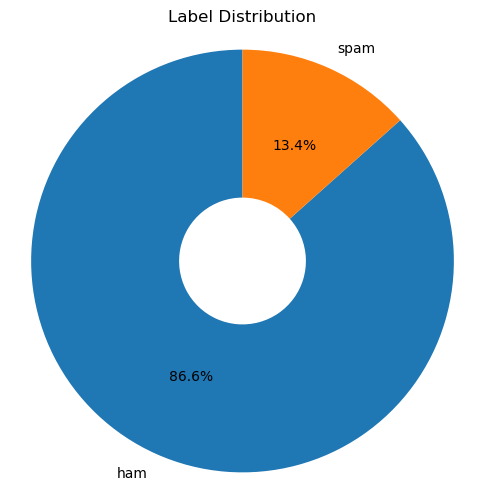

In [6]:
label_counts = df.groupby('label').size()

plt.figure(figsize=(6, 6))
plt.pie(
    label_counts,
    labels=label_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'width': 0.7}  # this creates the donut hole
)

plt.title("Label Distribution")
plt.axis('equal')  # makes it circular
plt.show()


The class distribution plot shows a strong imbalance in the dataset, with ham messages forming a large majority and spam messages representing a much smaller fraction. This indicates that the dataset is skewed toward non-spam messages, making accuracy an unreliable evaluation metric. As a result, metrics such as precision, recall, and PR-AUC are more appropriate, especially for evaluating spam detection performance.

### **top words in ham vs spam**

In [7]:
stop_words = set(stopwords.words('english'))
spam_msgs = df[df['label'] == 'spam']['message']
ham_msgs  = df[df['label'] == 'ham']['message']

spam_words = []
for msg in spam_msgs:
    tokens = word_tokenize(msg.lower())
    words = [w for w in tokens if w.isalpha() and w not in stop_words]
    spam_words.extend(words)

ham_words = []
for msg in ham_msgs:
    tokens = word_tokenize(msg.lower())
    words = [w for w in tokens if w.isalpha() and w not in stop_words]
    ham_words.extend(words)

spam_text = " ".join(spam_words)
ham_text  = " ".join(ham_words)


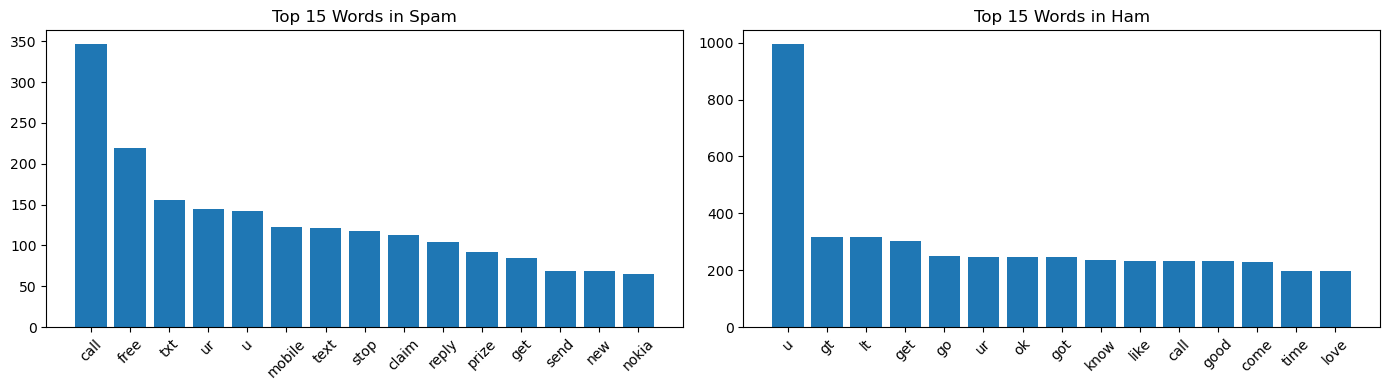

In [8]:
spam_top = Counter(spam_words).most_common(15)
ham_top  = Counter(ham_words).most_common(15)

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Spam
spam_words_, spam_counts = zip(*spam_top)
axes[0].bar(spam_words_, spam_counts)
axes[0].set_title("Top 15 Words in Spam")
axes[0].tick_params(axis='x', rotation=45)

# Ham
ham_words_, ham_counts = zip(*ham_top)
axes[1].bar(ham_words_, ham_counts)
axes[1].set_title("Top 15 Words in Ham")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


The histogram of top words shows that spam messages repeatedly use a small set of promotional keywords, while ham messages rely on common conversational terms. This demonstrates that word frequency alone carries discriminative information and supports the use of frequency-based text representations after removing stopwords.


### **word cloud of ham vs spam**

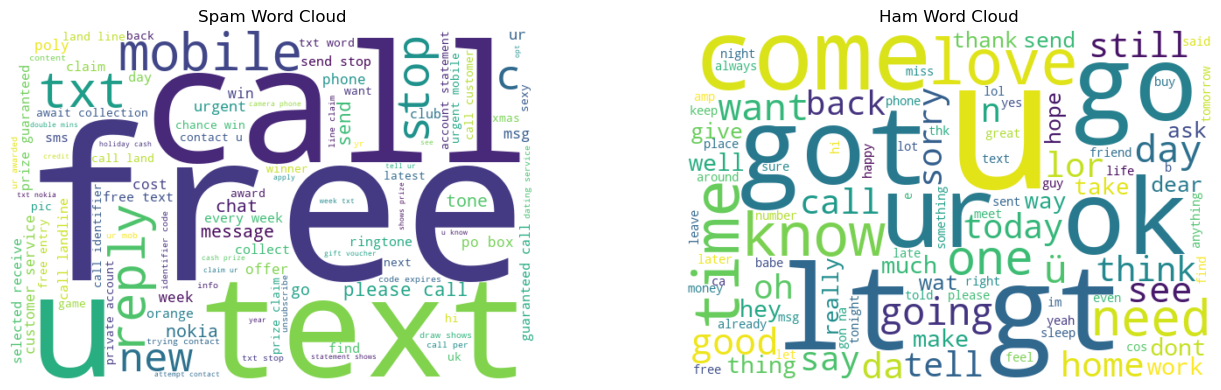

In [9]:
spam_wc = WordCloud(
    width=600,
    height=400,
    background_color="white",
    max_words=100
).generate(spam_text)

ham_wc = WordCloud(
    width=600,
    height=400,
    background_color="white",
    max_words=100
).generate(ham_text)

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

axes[0].imshow(spam_wc, interpolation="bilinear")
axes[0].set_title("Spam Word Cloud")
axes[0].axis("off")

axes[1].imshow(ham_wc, interpolation="bilinear")
axes[1].set_title("Ham Word Cloud")
axes[1].axis("off")

plt.tight_layout()
plt.show()


The word clouds highlight distinct language patterns across classes. Spam messages are dominated by promotional and action-oriented words such as “call,” “free,” and “prize,” whereas ham messages contain conversational and personal words like “ok,” “later,” and “love.” This visual contrast confirms that lexical content strongly differs between spam and ham messages.

In [10]:
df['length'] = df['message'].map(lambda text: len(text))
df.head(10)

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147
6,ham,Even my brother is not like to speak with me. ...,77
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160
8,spam,WINNER!! As a valued network customer you have...,157
9,spam,Had your mobile 11 months or more? U R entitle...,154


### **length distribution of all messages vs ham vs spam**

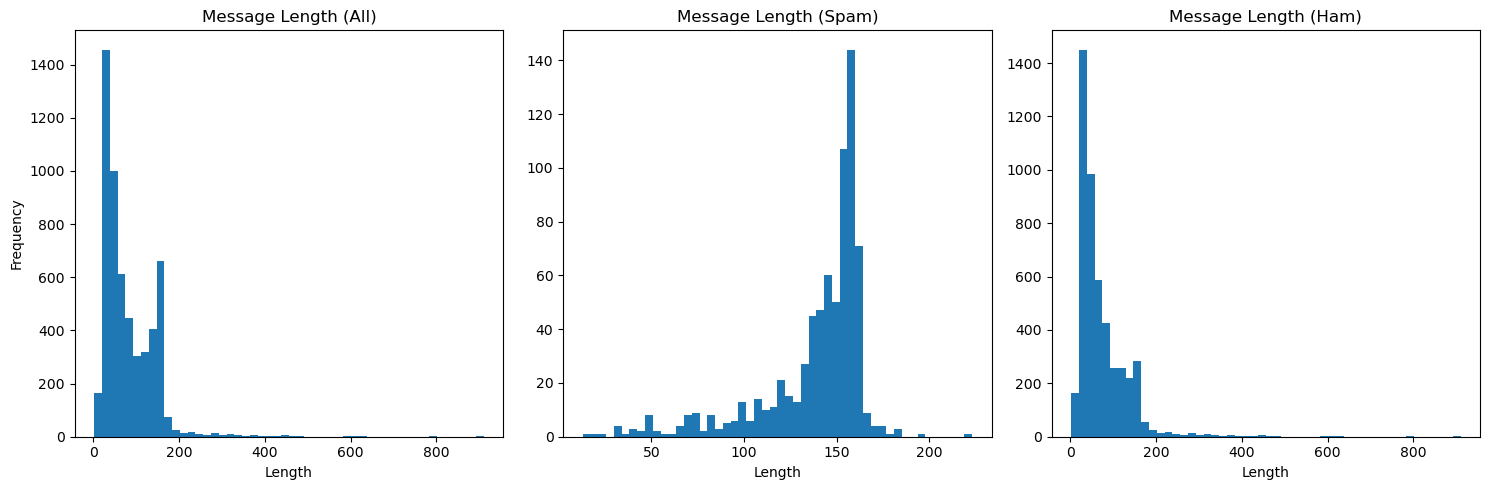

In [11]:
all_lengths  = df['length']
spam_lengths = df[df['label'] == 'spam']['length']
ham_lengths  = df[df['label'] == 'ham']['length']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Whole dataset
axes[0].hist(all_lengths, bins=50)
axes[0].set_title("Message Length (All)")
axes[0].set_xlabel("Length")
axes[0].set_ylabel("Frequency")

# Spam
axes[1].hist(spam_lengths, bins=50)
axes[1].set_title("Message Length (Spam)")
axes[1].set_xlabel("Length")

# Ham
axes[2].hist(ham_lengths, bins=50)
axes[2].set_title("Message Length (Ham)")
axes[2].set_xlabel("Length")

plt.tight_layout()
plt.show()


The message length histograms reveal clear differences between classes. Ham messages are generally short and tightly distributed, while spam messages tend to be longer and more variable. The overall distribution is right-skewed due to the presence of long spam messages. This suggests that message length is an informative feature and can help distinguish spam from ham.


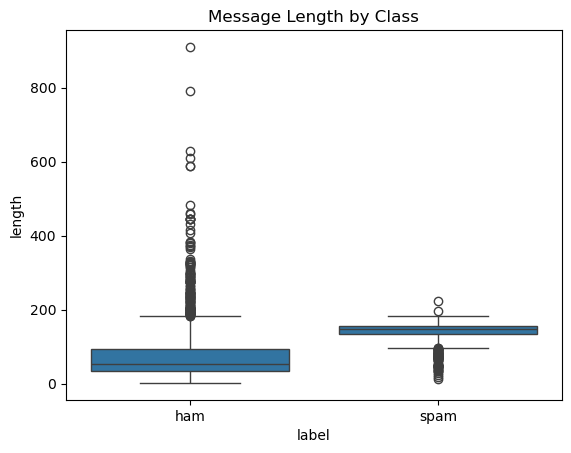

In [12]:
sns.boxplot(x='label', y='length', data=df)
plt.title("Message Length by Class")
plt.show()


### **Checking if message has URls or number**
Most spam has some of url and number embedded in it, we can see this from our result

In [13]:
df['has_url']   = df['message'].str.contains('http')
df['has_number'] = df['message'].str.contains(r'\d')

df.groupby('label')[['has_url', 'has_number']].mean()

,has_url,has_number
label,,
ham,0.000000,0.156619
spam,0.028112,0.947791


### **bi-grams in spam vs ham**

In [14]:
ham_bigrams = []
for msg in df[df['label']=='ham']['message']:
    tokens = [w for w in word_tokenize(msg.lower()) if w.isalpha()]
    ham_bigrams.extend(list(bigrams(tokens)))

spam_bigrams = []
for msg in df[df['label']=='spam']['message']:
    tokens = [w for w in word_tokenize(msg.lower()) if w.isalpha()]
    spam_bigrams.extend(list(bigrams(tokens)))

ham_top10  = Counter(ham_bigrams).most_common(10)
spam_top10 = Counter(spam_bigrams).most_common(10)

bigram_df = pd.DataFrame({
    "Ham Bigram":  [' '.join(bg) for bg, _ in ham_top10],
    "Ham Count":   [count for _, count in ham_top10],
    "-" :   ["|" for i in ham_top10],
    "Spam Bigram": [' '.join(bg) for bg, _ in spam_top10],
    "Spam Count":  [count for _, count in spam_top10],
})

bigram_df.style.hide(axis="index")

Ham Bigram,Ham Count,-,Spam Bigram,Spam Count
lt gt,276,|,you have,73
are you,176,|,call now,58
i am,134,|,have won,54
have a,111,|,your mobile,49
i will,106,|,to claim,46
do you,103,|,please call,45
you are,97,|,call from,45
i have,95,|,this is,41
if you,92,|,won a,40
and i,91,|,to now,38


### **tri-grams in spam vs ham**

In [15]:
ham_trigrams = []
for msg in df[df['label'] == 'ham']['message']:
    tokens = [w for w in word_tokenize(msg.lower()) if w.isalpha()]
    ham_trigrams.extend(list(trigrams(tokens)))

spam_trigrams = []
for msg in df[df['label'] == 'spam']['message']:
    tokens = [w for w in word_tokenize(msg.lower()) if w.isalpha()]
    spam_trigrams.extend(list(trigrams(tokens)))

ham_tri_top10  = Counter(ham_trigrams).most_common(10)
spam_tri_top10 = Counter(spam_trigrams).most_common(10)

trigram_df = pd.DataFrame({
    "Ham Trigram":  [' '.join(tg) for tg, _ in ham_tri_top10],
    "Ham Count":    [count for _, count in ham_tri_top10],
    "-" :           ["|" for _ in ham_tri_top10],
    "Spam Trigram": [' '.join(tg) for tg, _ in spam_tri_top10],
    "Spam Count":   [count for _, count in spam_tri_top10],
})

trigram_df.style.hide(axis="index")

Ham Trigram,Ham Count,-,Spam Trigram,Spam Count
i call later,39,|,you have won,37
sorry i call,38,|,have won a,33
how are you,38,|,prize guaranteed call,21
i want to,30,|,a prize guaranteed,20
i love you,28,|,urgent your mobile,18
let me know,26,|,to contact you,16
have a great,25,|,private your account,16
i miss you,25,|,your account statement,16
where are you,23,|,account statement for,16
lt decimal gt,23,|,guaranteed call from,16


The bigram comparison table reveals that spam messages contain directive and persuasive phrases such as “call now” and “free entry,” whereas ham messages consist of natural conversational phrases like “see you” and “i am.” This shows that bigrams capture contextual intent better than unigrams and provide stronger class separation.

The trigram analysis further strengthens this distinction by capturing complete phrases. Spam trigrams often form full calls-to-action, while ham trigrams reflect casual conversational flow. This indicates that higher-order n-grams encode meaningful semantic patterns useful for classification.


### **Exclamation mark and caps ratio of ham vs spam**

In [16]:
df['exclamation_count'] = df['message'].apply(lambda x: x.count('!'))
df['caps_ratio'] = df['message'].apply(
    lambda x: sum(1 for c in x if c.isupper()) / max(len(x), 1)
)

df.groupby('label')[['exclamation_count', 'caps_ratio']].mean()

,exclamation_count,caps_ratio
label,,
ham,0.176507,0.05848
spam,0.729585,0.11091


In [17]:
df.describe()

,length,exclamation_count,caps_ratio
count,5574.000000,5574.000000,5574.000000
mean,80.478292,0.250628,0.065506
std,59.848302,0.687338,0.109071
min,2.000000,0.000000,0.000000
25%,36.000000,0.000000,0.025641
50%,62.000000,0.000000,0.037037
75%,122.000000,0.000000,0.060606
max,910.000000,11.000000,1.000000


### **Overall EDA Summary**

Overall, the EDA demonstrates that spam and ham messages differ significantly in length, vocabulary, and phrase structure. Spam messages are longer, more repetitive, and dominated by promotional language, while ham messages are shorter and conversational. These insights directly motivate the use of TF-IDF with n-grams and explain the strong performance of classical text classification models.


# **Data Preprocessing**

## **Preprocessing SMS text**

In [18]:
# finding sets of english stopwords
stop_words = set(stopwords.words('english'))

# function for preprocessing SMS
def preprocess_text(text):
    tokens = word_tokenize(text)   # Tokenization
    tokens = [token for token in tokens if token not in stop_words]   # Stopword removal
    
    lemmatizer = WordNetLemmatizer()   # Lemmatization
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    tokens = [token.lower() for token in tokens]   # Converting all text to lowercase
    tokens = [token for token in tokens if token != '']   # Removing empty strings
    
    return tokens

df['message'] = df['message'].apply(preprocess_text)
df.head()

,label,message,length,has_url,has_number,exclamation_count,caps_ratio
0,ham,"[go, jurong, point, ,, crazy, .., available, b...",111,False,False,0,0.027027
1,ham,"[ok, lar, ..., joking, wif, u, oni, ...]",29,False,False,0,0.068966
2,spam,"[free, entry, 2, wkly, comp, win, fa, cup, fin...",155,False,True,0,0.064516
3,ham,"[u, dun, say, early, hor, ..., u, c, already, ...",49,False,False,0,0.040816
4,ham,"[nah, i, n't, think, go, usf, ,, life, around,...",61,False,False,0,0.032787


### **Replace string length with number of different tokens in preprocessed SMS**

In [19]:
df['length'] = df['message'].apply(len)
df.head(10)

,label,message,length,has_url,has_number,exclamation_count,caps_ratio
0,ham,"[go, jurong, point, ,, crazy, .., available, b...",20,False,False,0,0.027027
1,ham,"[ok, lar, ..., joking, wif, u, oni, ...]",8,False,False,0,0.068966
2,spam,"[free, entry, 2, wkly, comp, win, fa, cup, fin...",32,False,True,0,0.064516
3,ham,"[u, dun, say, early, hor, ..., u, c, already, ...",11,False,False,0,0.040816
4,ham,"[nah, i, n't, think, go, usf, ,, life, around,...",10,False,False,0,0.032787
5,spam,"[freemsg, hey, darling, 's, 3, week, 's, word,...",26,False,True,2,0.047619
6,ham,"[even, brother, like, speak, ., they, treat, l...",11,False,False,0,0.025974
7,ham,"[as, per, request, 'melle, melle, (, oru, minn...",22,False,True,0,0.062500
8,spam,"[winner, !, !, as, valued, network, customer, ...",26,False,True,3,0.076433
9,spam,"[had, mobile, 11, month, ?, u, r, entitled, up...",22,False,True,1,0.090909


### **Encoding label ham as '0' and spam as '1'**

In [20]:
# function for encoding ham as 0 and spam as 1
def encode(text):
    if text == 'spam':
        return 1
    elif text == 'ham':
        return 0
df['label'] = df['label'].apply(encode)

### **Splitting into Train set, Test set and Validation set**

In [21]:
def split_data(df, seed=42, train_size=0.7, val_size=0.2, test_size=0.1):
    assert abs(train_size + val_size + test_size - 1.0) < 1e-6

    # Train vs (Val + Test)
    train_df, val_test_df = train_test_split(
        df,
        test_size=1 - train_size,
        random_state=seed,
        stratify=df['label']
    )

    # Val vs Test (stratify again)
    val_df, test_df = train_test_split(
        val_test_df,
        test_size=test_size / (val_size + test_size),
        random_state=seed,
        stratify=val_test_df['label']
    )

    return train_df, val_df, test_df

train_df, val_df, test_df = split_data(df)

### **Summary of datasets**

In [22]:
def label_summary(df, name="Dataset"):
    counts = df['label'].value_counts()
    ratios = df['label'].value_counts(normalize=True)

    print(f"\n{name}")
    print(f"Total: {len(df)}")

    for label in counts.index:
        print(f"{label} | count: {counts[label]} | ratio: {ratios[label]:.4f}")



label_summary(df, "main data set")
label_summary(train_df, "Train set")
label_summary(val_df, "Validation set")
label_summary(test_df, "Test set")



main data set
Total: 5574
0 | count: 4827 | ratio: 0.8660
1 | count: 747 | ratio: 0.1340

Train set
Total: 3901
0 | count: 3378 | ratio: 0.8659
1 | count: 523 | ratio: 0.1341

Validation set
Total: 1115
0 | count: 966 | ratio: 0.8664
1 | count: 149 | ratio: 0.1336

Test set
Total: 558
0 | count: 483 | ratio: 0.8656
1 | count: 75 | ratio: 0.1344


In [23]:
train_df.head(10)

,label,message,length,has_url,has_number,exclamation_count,caps_ratio
1847,0,"[its, engalnd, !, but, telly, decided, wo, n't...",16,False,False,3,0.028037
3258,0,"[no, ,, told, going, ,, got, drunk, !]",8,False,False,1,0.017544
2659,0,"[not, yet, chikku, .., wat, abt, u, ?]",8,False,False,0,0.038462
2086,0,"[moji, love, word, ., have, rich, day]",7,False,False,0,0.041667
3065,0,"[ok., how, many, buy, .]",5,False,False,0,0.076923
1721,0,"[fighting, world, easy, ,, u, either, win, los...",26,False,True,0,0.006711
3740,0,"[did, stitch, trouser]",3,False,False,0,0.038462
4930,1,"[got, take, 2, take, part, wrc, rally, oz, ?, ...",28,False,True,2,0.106918
2867,0,"[smith, waste, da.i, wan, na, gayle, .]",7,False,False,0,0.034483
1852,0,"[dunno, da, next, show, aft, 6, 850, ., toa, p...",13,False,True,0,0.039216


In [24]:
val_df.head(10)

,label,message,length,has_url,has_number,exclamation_count,caps_ratio
179,0,"[text, ., if, doesnt, reply, let, know, log]",8,False,False,0,0.030303
4700,0,"[yes, fine]",2,False,False,0,0.111111
386,0,"[it, took, mr, owl, 3, lick]",6,False,True,0,0.090909
1859,0,"[sir, ,, waiting, call, .]",5,False,False,0,0.031250
1904,1,"[free, entry, 2, weekly, comp, chance, win, ip...",27,False,True,0,0.048951
5179,0,"[very, strange, ., watching, 2nd, one, 'm, bed...",14,False,True,0,0.023256
1947,0,"[hey, go, jazz, power, yoga, hip, hop, kb, yog...",9,False,False,0,0.018519
1582,0,"[hhahhaahahah, rofl, wtf, nig, leonardo, room,...",7,False,False,0,0.015625
32,0,"[k, tell, anything, .]",4,False,False,0,0.034483
4744,0,"[i, hospital, da, ., ., i, return, home, evening]",9,False,False,0,0.038462


In [25]:
test_df.head(10)

,label,message,length,has_url,has_number,exclamation_count,caps_ratio
5506,0,"[wait, ., i, msg, &, lt, ;, #, &, gt, ;, min, .]",13,False,False,0,0.050000
1723,0,"[thought, praps, meant, another, one, ., goodo...",12,False,False,1,0.047619
2155,0,"[oh, god, happy, see, message, 3, day]",7,False,True,0,0.020000
2302,0,"[&, lt, ;, #, &, gt, ;, ,, 's, ?, guess, 's, e...",14,False,False,0,0.020833
215,0,"[sounds, great, !, are, home, ?]",6,False,False,1,0.064516
5495,0,"[i, think, rule, tamilnadu, .., tough, people, .]",8,False,False,0,0.015385
5333,0,"[x, course, 2yrs, ., just, message, messenger,...",10,False,True,0,0.027778
4537,0,"[never, blame, day, ur, life, ., good, day, gi...",30,False,False,2,0.039474
2496,1,"[winner, !, as, valued, network, customer, hva...",22,False,True,2,0.093960
4827,0,"[haha, ,, i, thinkin]",4,False,False,0,0.068966


### **Saving prepared files Main Dataset, Train set, Test set and Validation set**

In [26]:
df_path = os.path.join(folder_path, "df.csv")
train_df_path = os.path.join(folder_path, "train_df.csv")
validation_df_path = os.path.join(folder_path, "validation_df.csv")
test_df_path = os.path.join(folder_path, "test_df.csv")


df.to_csv(df_path, index = False)
train_df.to_csv(train_df_path, index=False)
val_df.to_csv(validation_df_path, index=False)
test_df.to_csv(test_df_path, index=False)